In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='huilyu2', api_key='LYEkqxDQFmZzZIBXn9rn')
import plotly.plotly as py
from plotly.graph_objs import *

In [57]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 20)

In [4]:
trips_df = pd.read_csv("GTFS Dataset/trips.csv")

In [5]:
trips_df.columns

Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id', 'shape_id'],
      dtype='object')

In [6]:
trips_df.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13


How many trips for each route?

In [13]:
len(np.unique(trips_df["route_id"])) # How many routes in all

100

In [55]:
trips_count = Counter(trips_df["route_id"])

In [8]:
trips_count.most_common(10)

[('SILVER', 333),
 ('ILLINI', 250),
 ('TEAL', 238),
 ('ILLINI EVENING', 224),
 ('TEAL SATURDAY', 222),
 ('YELLOWHOPPER', 141),
 ('ILLINI LIMITED SATURDAY', 138),
 ('ILLINI EVENING SATURDAY', 135),
 ('GREEN SATURDAY', 129),
 ('YELLOW SATURDAY', 127)]

In [77]:
shape_id_dict = {}
trip_count_dict = {}
for word, count in trips_count.most_common(10):
    trip_count_dict[word]=count # A route corresponds to its number of trips
    shape_id_dict[word]=np.unique(trips_df[trips_df.route_id == word][["shape_id"]])
    # A route correponds to its several shapes

In [96]:
import operator
trip_count_list = sorted(trip_count_dict.items(), key=operator.itemgetter(1), reverse=True)
trip_count_df = pd.DataFrame(trip_count_list,columns = ['route_id', 'number of trips'])

In [97]:
trip_count_df

,route_id,number of trips
0,SILVER,333
1,ILLINI,250
2,TEAL,238
3,ILLINI EVENING,224
4,TEAL SATURDAY,222
5,YELLOWHOPPER,141
6,ILLINI LIMITED SATURDAY,138
7,ILLINI EVENING SATURDAY,135
8,GREEN SATURDAY,129
9,YELLOW SATURDAY,127


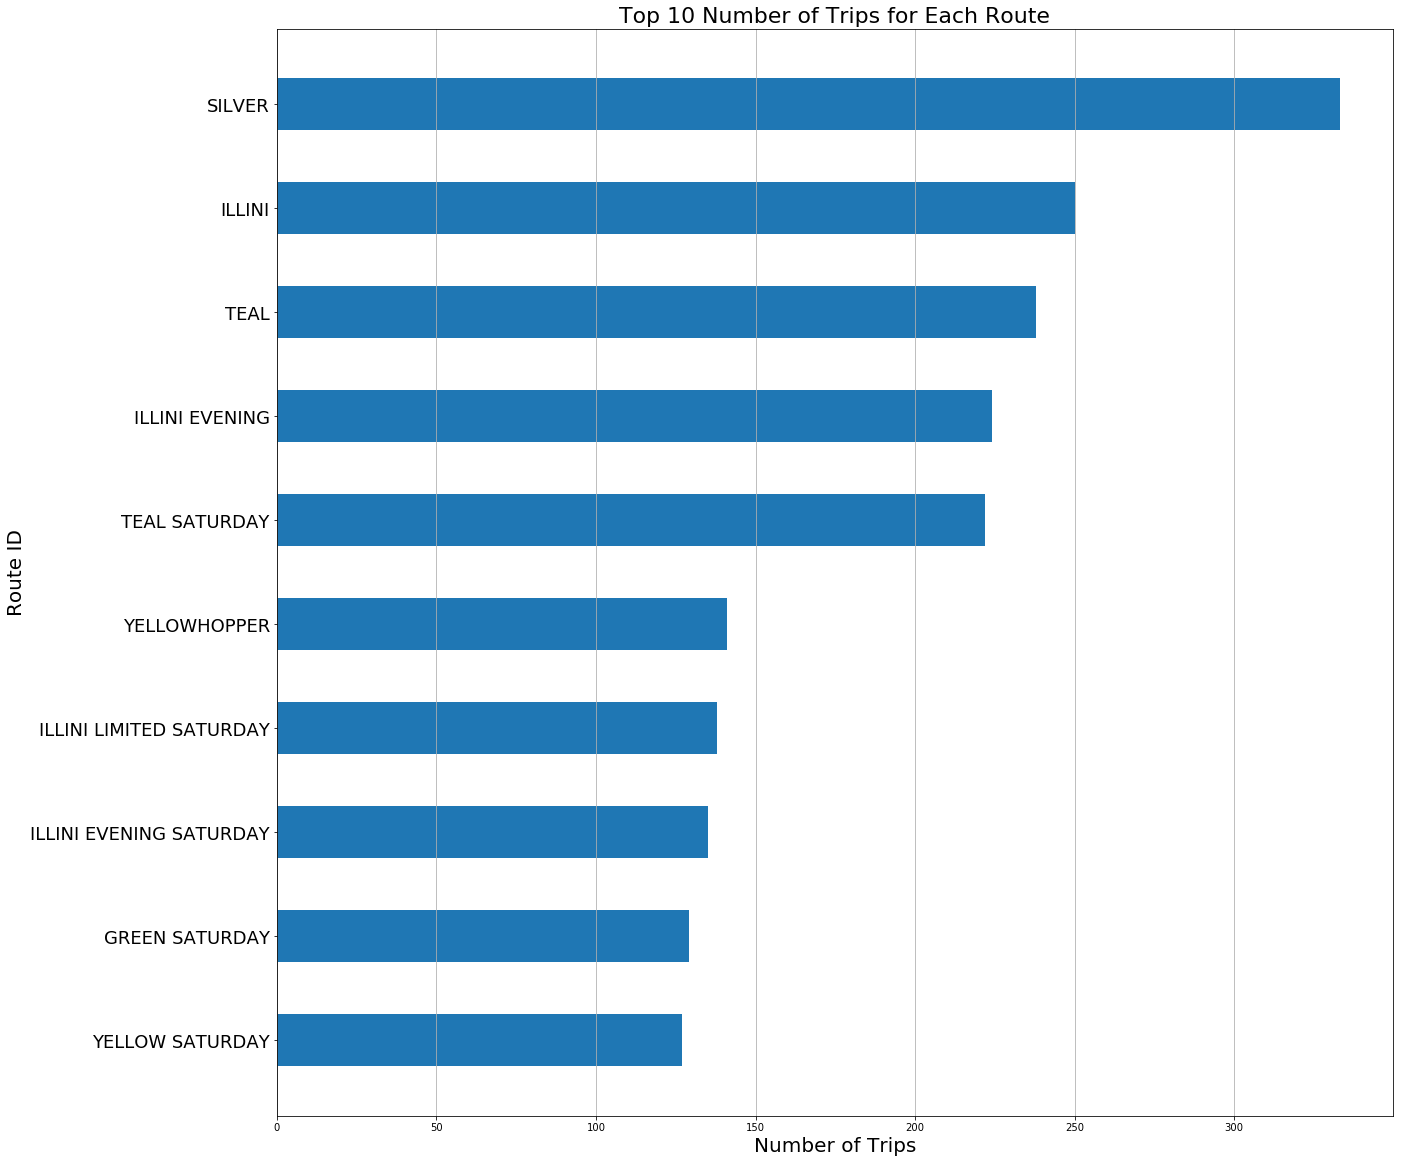

In [116]:
fig, ax = plt.subplots()
plt.barh(bottom=np.arange(10)[::-1], width=trip_count_df['number of trips'], height=0.5)
plt.xlabel("Number of Trips",fontsize=20)
plt.ylabel("Route ID",fontsize=20)
ax.set_yticks(np.arange(10)[::-1])
ax.set_yticklabels(trip_count_df['route_id'], fontsize=18)
plt.title("Top 10 Number of Trips for Each Route",fontsize=22)
ax.xaxis.grid(True) 

In [29]:
shape_id_dict

{'GREEN SATURDAY': array(['50E->MNBDY', '50E->PC', '50E-WKND-HP->CF', 'GN1SATPO', 'GN1SUNPO',
        'GREEN WEEKEND 23', 'GREEN WEEKEND 44', '[@15.0.63188916@]15',
        '[@15.0.68513015@]219', '[@15.0.68513015@]220',
        '[@15.0.73006437@]18', '[@15.0.73006437@]37', '[@15.0.73006437@]38'], dtype=object),
 'ILLINI': array(['22N ILLINI 10', '22S ILLINI 20', '22S ILLINI 21', 'ILLINI 34',
        'ILLINI 46', 'ILLINI 47', '[@15.0.63192528@]43',
        '[@15.0.66063553@]12', '[@15.0.68513188@]4'], dtype=object),
 'ILLINI EVENING': array(['220N ILLINI 10', '220S ILLINI 20', 'ILLINI EV 25',
        '[@14.0.56288498@]24', '[@2.0.85634827@]37'], dtype=object),
 'ILLINI EVENING SATURDAY': array(['[@124.0.92260187@]220N ILLINI 10',
        '[@124.0.92260187@]220S ILLINI 20', '[@124.0.92260187@]24',
        '[@124.0.92260187@]ILLINI EV 25'], dtype=object),
 'ILLINI LIMITED SATURDAY': array(['22N ILLINI LIMITED WEEKEND', 'GR2PO', 'ILLINI LIMITED WEEKEND 845'], dtype=object),
 'SILVER': arr

In [11]:
trips_count.most_common()[:-11:-1]

[('1N YELLOW ALT', 1),
 ('10W GOLD ALT', 1),
 ('7W GREY ALT', 1),
 ('5W GREEN ALT 2', 1),
 ('BROWN ALT1', 1),
 ('1N YELLOW ALT PM', 2),
 ('GREEN EXPRESS ALT', 3),
 ('5E GREEN EXPRESS 1 ALT', 3),
 ('5W GREEN EXPRESS 2', 4),
 ('5E GREEN EXPRESS ALT', 4)]

In [30]:
shapes_df = pd.read_csv("GTFS Dataset/shapes.csv")

In [40]:
shapes_df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,[@2.0.86175868@]34,40.114158,-88.173105,0,0.000000
1,[@2.0.86175868@]34,40.114158,-88.173106,1,0.134184
2,[@2.0.86175868@]34,40.114171,-88.173107,2,1.560577
3,[@2.0.86175868@]34,40.114186,-88.173108,3,3.228456
4,[@2.0.86175868@]34,40.114200,-88.173109,4,4.787531


In [119]:
shapes_df[shapes_df.shape_id == shape_id_dict["SILVER"][0]]

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
712484,SILVER 120,40.111648,-88.208030,0,0.000000
712485,SILVER 120,40.111605,-88.208029,1,4.801644
712486,SILVER 120,40.111604,-88.208059,2,7.368731
712487,SILVER 120,40.111603,-88.208095,3,10.428593
712488,SILVER 120,40.111602,-88.208130,4,13.404934
712489,SILVER 120,40.111601,-88.208166,5,16.467737
712490,SILVER 120,40.111601,-88.208175,6,17.238564
712491,SILVER 120,40.111600,-88.208211,7,20.301367
712492,SILVER 120,40.111599,-88.208247,8,23.364169
712493,SILVER 120,40.111598,-88.208283,9,26.426972


In [42]:
shape_id_dict["SILVER"]

array(['SILVER 120', 'SILVER 2', 'SILVER 42', 'SILVER 43',
       '[@15.0.73007178@]121'], dtype=object)